In [9]:
import pandas as pd
import numpy as np
import skbio.stats.ordination as ordination
import matplotlib.pyplot as plt
from PIL import Image
import io

In [10]:
# braycurtis = pd.read_csv("bray-curtis-distance-matrix.tsv", header=0, delimiter="\t", dtype={'Unnamed: 0': np.str_}).set_index("Unnamed: 0")
braycurtis = pd.read_csv("bray-curtis-distance-matrix.tsv", header=0, index_col=0, delimiter="\t")
braycurtis = braycurtis.sort_index()
braycurtis = braycurtis.sort_index(axis=1)
unifrac = pd.read_csv("unweighted-unifrac-distance-matrix.tsv", header=0, index_col=0, delimiter="\t")
unifrac = unifrac.sort_index()
unifrac = unifrac.sort_index(axis=1)
metadata = pd.read_csv("metadata.tsv", header=0, index_col=0, dtype={'sampleid': np.str_}, delimiter='\t')

In [11]:
pcoa_bc = ordination.pcoa(braycurtis, number_of_dimensions=3)
pcoa_uni = ordination.pcoa(unifrac, number_of_dimensions=3)

c:\Users\sdwan\anaconda3\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.08698278226826754 and the largest is 4.334229644027546.
  warn(


In [12]:
diags = ["Healthy" if x == "HC" else "Schizophrenic" for x in metadata["diagnosis"]]

In [13]:
df = pcoa_bc.samples.copy()
df['diagnosis'] = diags
df2 = df[['diagnosis']].copy()

In [14]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["green", "red"])

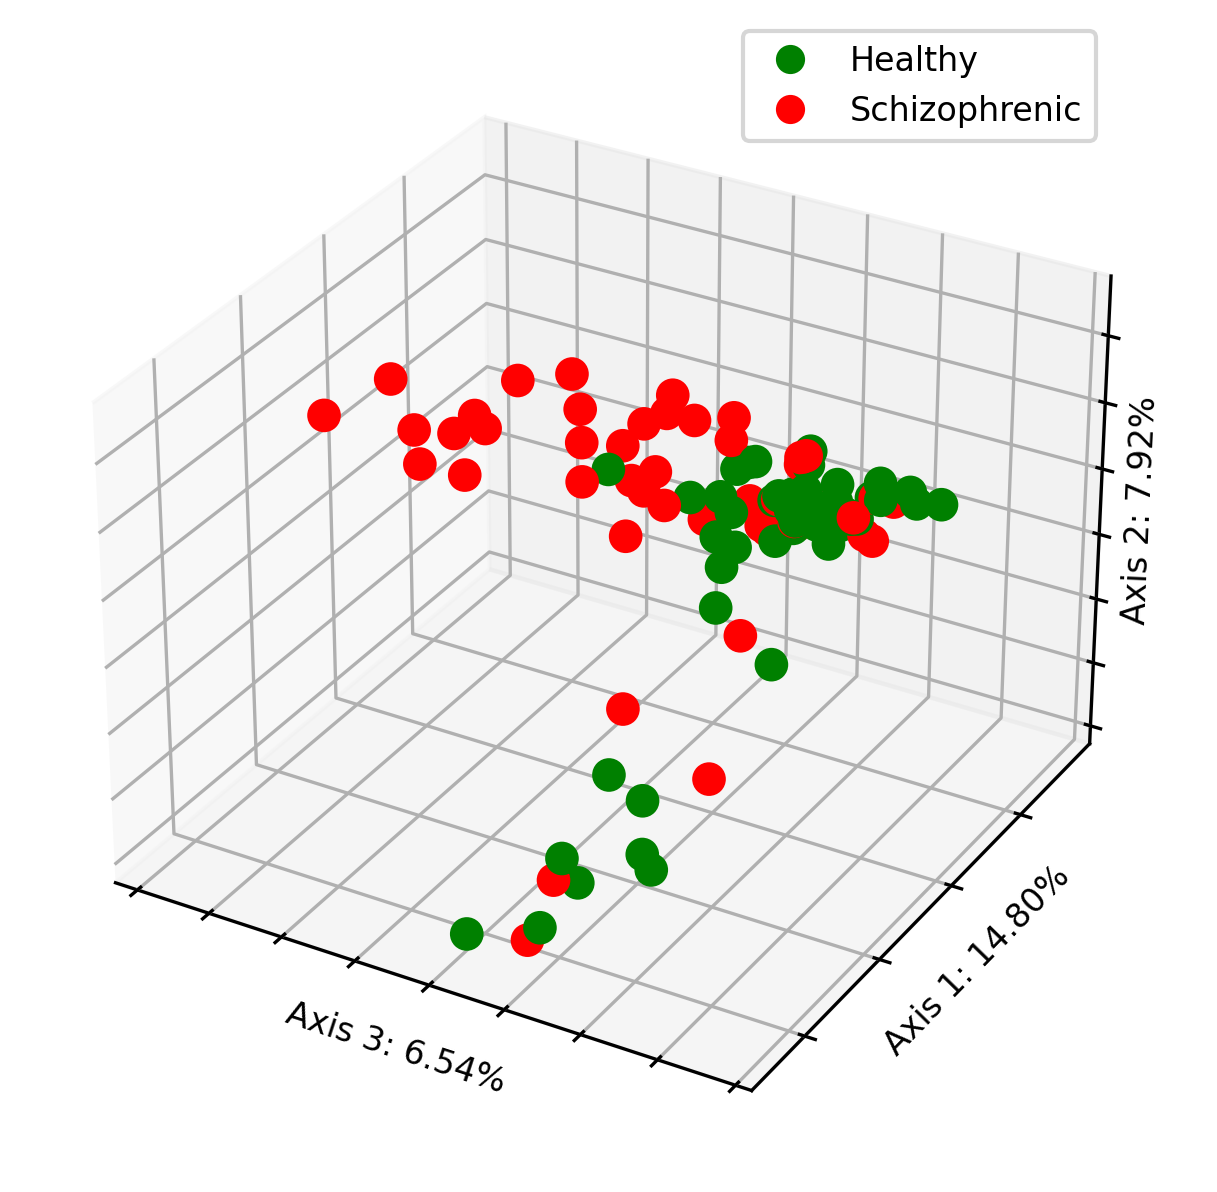

In [15]:
# var_bc = ["Axis 1: "+'%.2\%' % pcoa_bc.proportion_explained.loc['PC1'], "Axis 2: "+'%.2\%' % pcoa_bc.proportion_explained.loc['PC2'], "Axis 3: "+'%.2\%' % pcoa_bc.proportion_explained.loc['PC3']]
# var_uni = ["Axis 1: "+'%.2\%' % pcoa_uni.proportion_explained.loc['PC1'], "Axis 2: "+'%.2\%' % pcoa_uni.proportion_explained.loc['PC2'], "Axis 3: "+'%.2\%' % pcoa_uni.proportion_explained.loc['PC3']]

var_bc = ["Axis 1: {:.2%}".format(pcoa_bc.proportion_explained.loc['PC1']), "Axis 2: {:.2%}".format(pcoa_bc.proportion_explained.loc['PC2']), "Axis 3: {:.2%}".format(pcoa_bc.proportion_explained.loc['PC3'])]

plt.rcParams.update({'font.size': 8})
fig1 = pcoa_bc.plot(df=df2, column='diagnosis', cmap=cmap2, axis_labels=(var_bc[2], var_bc[0], var_bc[1]), axes=[2,0,1], s=50)
fig1.set_size_inches(5,5)
fig1.set_dpi(300)
fig1.savefig("braycurtis.tiff", dpi=300)
plt.show()

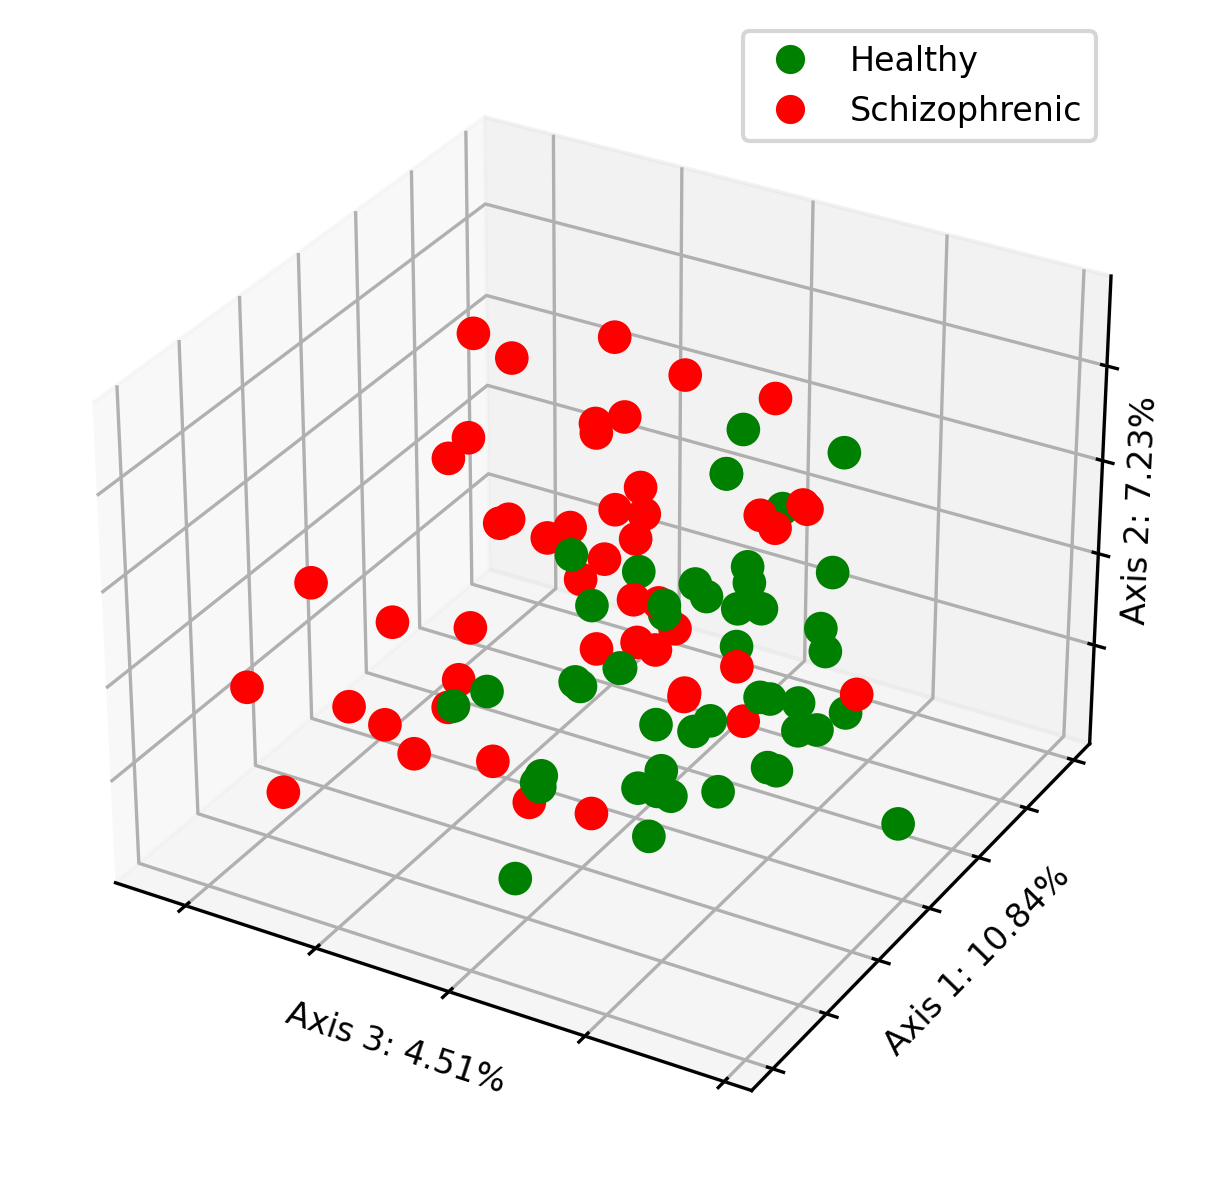

In [16]:
var_uni = ["Axis 1: {:.2%}".format(pcoa_uni.proportion_explained.loc['PC1']), "Axis 2: {:.2%}".format(pcoa_uni.proportion_explained.loc['PC2']), "Axis 3: {:.2%}".format(pcoa_uni.proportion_explained.loc['PC3'])]

fig2 = pcoa_uni.plot(df=df2, column='diagnosis', cmap=cmap2, axis_labels=(var_uni[2], var_uni[0], var_uni[1]), axes=[2,0,1], s=50)
fig2.set_size_inches(5,5)
fig2.set_dpi(300)
fig2.savefig("unifrac.tiff", dpi=300)
plt.show()